In [1]:
from __future__ import division, print_function

In [2]:
import sys
sys.path.append('./')
import os.path

In [3]:
import numpy as np
from plot import plot_det, plot_fit
import matplotlib.pyplot as plt
from common import basecolors, lightcolors, darkcolors
from common import num_representation, safe_num_representation_max
from common import OrganNames, A0s, taus, DetNames, MCout 
from common import activity, det_response_teo, det_contributions, det_response

In [4]:
from prior_common import widths, times, CPSall, errCPSall

In [5]:
processed_lists = np.load('prior2.npy',allow_pickle=True)

In [6]:
for i, processed_list in enumerate(processed_lists):
    print("len(processed_list)",len(processed_list))
    for n, res_Nelder in enumerate(processed_list):
        if i==0 and n==0 :
            print("i:",i)
            #print(res_Nelder)
            print(type(res_Nelder))
            print(res_Nelder.x)

len(processed_list) 100
i: 0
<class 'scipy.optimize.optimize.OptimizeResult'>
[7.49981502e+08 1.14976047e+08 1.04999089e+08 3.50034741e+07
 1.11500614e+09 1.30039296e+08 2.52380784e+02 1.62965181e+01
 1.37164093e+01 9.74348683e+00 3.07831500e+01 2.25284950e+01]
len(processed_list) 100
len(processed_list) 100
len(processed_list) 100
len(processed_list) 100
len(processed_list) 100
len(processed_list) 100
len(processed_list) 100
len(processed_list) 100


In [7]:
x = np.concatenate((A0s,taus)) 
tin = times[0]
tfin = times[-1]
#AttTrue = A0s*taus*(np.exp(-tfin/taus)-np.exp(-tin/taus))
AttTrue = A0s*taus

residuiA0_means = np.empty(shape=(len(widths),len(A0s)))
residuiA0_vars = np.empty(shape=(len(widths),len(A0s)))
residuiTau_means = np.empty(shape=(len(widths),len(taus)))
residuiTau_vars = np.empty(shape=(len(widths),len(taus)))
Att_means = np.empty(shape=(len(widths),len(A0s)))
Att_vars = np.empty(shape=(len(widths),len(A0s)))
#residui = np.empty(shape=(len(widths),len(A0)+len(tau))
for i, processed_list in enumerate(processed_lists): #loop sulla percentuale di semaring
    res_chisq = np.empty(len(processed_list))
    residui = np.empty(shape=(len(processed_list),len(A0s)+len(taus)))
    Att = np.empty(shape=(len(processed_list),len(A0s)))
    for n, res_Nelder in enumerate(processed_list): #loop sui tentativi di fit per ogni smearing
        #print("i:",i,"n:",n)
        residui[n] = (res_Nelder.x-x)/x*100
        A = res_Nelder.x[:6]
        tau = res_Nelder.x[6:] 
        #tmp = (A*tau*(np.exp(-tfin/tau)-np.exp(-tin/tau)))
        tmp = A*tau
        Att[n] = (tmp - AttTrue)/AttTrue*100
        #print("residui",residui,"%")
    #print("################","end loop","#################")    

    for j in range(len(A0s)):
        residuiA0_means[i][j] = np.mean(residui[:,j])
        residuiA0_vars[i][j] = np.std(residui[:,j])
        residuiTau_means[i][j] = np.mean(residui[:,j+len(A0s)])
        residuiTau_vars[i][j] = np.std(residui[:,j+len(A0s)])
        Att_means[i][j] = np.mean(Att[:,j])
        Att_vars[i][j] = np.std(Att[:,j])        

In [8]:
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.71,.8,.6))
for j in range(len(A0s)):
    x = np.asarray(widths)*100
    x = x+j - len(A0s)/2
    plt.errorbar(x, Att_means[:,j], Att_vars[:,j], None, 'o', label=OrganNames[j],color=lightcolors[j])
#plt.ylim(-100,100)
plt.grid(axis='y')
plt.xticks(widths*100)
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_ylabel(r'Residual $A_{tot}$ [%]')
plt.gca().set_xlabel("Prior sampling half-width [%]")

Text(0.5, 0, 'Prior sampling half-width [%]')

RMS 0.3603070264286539


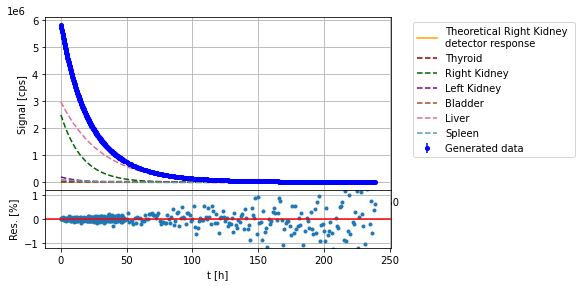

In [9]:
plot_det(2, times, A0s,taus, MCout, CPSall)

RMS 0.35940674917371335


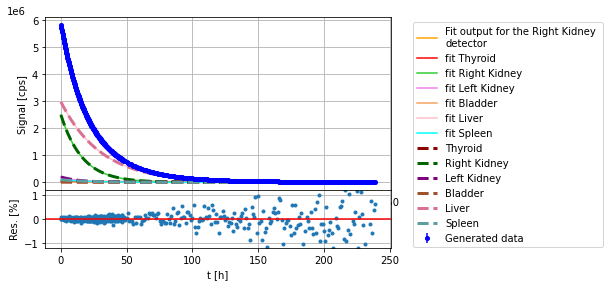

In [10]:
#il primo numero e' per decidere quale larghezza di campionamento prendere per il plot 
fit_output = processed_lists[4][0] 
plot_fit(2,fit_output, times, A0s, taus, MCout, CPSall)

In [11]:
for i in range(len(DetNames)):
    y = det_response(times,A0s,taus,i)
    plt.errorbar(times, y/1.e+6, np.sqrt(y)/1.e+6,None, 'o', markersize=1, label=DetNames[i])
plt.xlabel('t [h]')
plt.ylabel(r'Signal [cps$\cdot 10^{6}$]')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')